# Experiment and path specification

In [64]:
# Specify the experiment for analysis
# experiment='cxic00318'
# runNumber = 123
# experiment='cxix40218'
# runNumber=55
# experiment='cxilu9218'
# runNumber=235 # includes cspad info
# experiment='cxix38318'
# runNumber=13 # alpha terpenine
# runNumber=15 # pyridine
# runNumber=18 # acetylacetone
# runNumber=11 # neon
# runNumber=7 # sf6
# runNumber=32 # alpha terp, bad run

experiment='cxilv1118'
runNumber = 9 # tt calib
runNumber = 8 # diode scan
runNumber = 118 # start of AcAc pump-probe
runNumber=129
runNumber=113
runNumber=117
runNumber=130
runNumber=135
runNumber=145
runNumber=112
runNumber=110
runNumber=75

# Set the installation and output path
import os
# os.environ['INSTALLPATH']= '/cds/data/psdm/cxi/cxilv1118/results/referenceScripts/TRXS-Run18v4'
os.environ['INSTALLPATH']= '/cds/home/m/mrware/TRXS-dev/TRXS-Run18v4'
os.environ['OUTPUTPATH']= '/cds/data/psdm/%s/%s/scratch' % (experiment[0:3],experiment)

# Import Libraries

In [65]:
# Magic iPython command to enable plotting
%matplotlib inline

# Load in the pythonBatchMagic library
import sys
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/pythonBatchMagic')
from pythonBatchMagic import *

# Determine current user
currentUser, error = unixCMD("echo $USER")
currentUser = currentUser.strip()
print(currentUser)
os.environ['RESULTSPATH']= ('/cds/data/psdm/%s/%s/results/%s' % (experiment[0:3],experiment,currentUser)).strip()
if not os.path.exists(os.environ['RESULTSPATH']):
    os.mkdir(os.environ['RESULTSPATH'])

mrware


# Leveraging the batch queue to quickly grab point data

## Loading libraries

In [66]:
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/LCLS')
from LCLSdefault import *

sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/mattsLibraries')
from picklez import *

# Load in the get data library
from dataAnalysis import *

# Load in the batch library for lcls
from lclsBatch import *

## Grabbing point data across nodes

In [67]:
# detDict = {
#     'uvint1':{'name': 'Acqiris','get-function':'getAcqirisSum1'},
#            'uvint0':{'name': 'Acqiris','get-function':'getAcqirisSum0'},
#            'gasPressure':{'name': 'CXI:MKS670:READINGGET','get-function':'getGasPressure'},
#            'xrayEnergy':{'name':'FEEGasDetEnergy','get-function': 'getXrayEnergy' },
#            'ebeamcharge':{'name':'EBeam', 'get-function': 'getEbeamCharge'},
#           'stageencoder':{'name':'CXI:LAS:MMN:04.RBV','get-function':'getStageEncoder'},
#           'ttfltpos':{'name':'CXI:TIMETOOL:FLTPOS', 'get-function': 'getTTFltPos'},
#           'ttfltposfwhm':{'name':'CXI:TIMETOOL:FLTPOSFWHM', 'get-function': 'getTTFltPos'},
#           'ttfltposampl':{'name':'CXI:TIMETOOL:AMPL', 'get-function': 'getTTFltPos'},
#           'vitpos':{'name':'LAS:FS5:VIT:FS_TGT_TIME_DIAL', 'get-function': 'getTTFltPos'},
#           'seconds':{'name':'seconds', 'get-function': 'getSeconds'},
#           'nanoseconds':{'name':'nanonseconds', 'get-function': 'getNanoseconds'},
#           'fiducials':{'name':'fiducials', 'get-function': 'getFiducials'},
#           'rois':{'name':'jungfrau4M', 'get-function': 'getRadialrois'},
#           'laserOn1':{'name':'evr1', 'get-function': 'getLaserOn'},
#           'xrayOn1':{'name':'evr1', 'get-function': 'getXrayOn'},
#           'laserOn2':{'name':'evr2', 'get-function': 'getLaserOn'},
#           'xrayOn2':{'name':'evr2', 'get-function': 'getXrayOn'},
#            'xint':{'name':'CXI-DG3-BMMON', 'get-function': 'getDiodeTotalIntensity'}
# #           'photonHist':{'name':'jungfrau4M', 'get-function': 'getPhotonHistogram'}
#           }

detDict = {
    'uvint1':{'name': 'Acqiris','get-function':'getAcqirisSum1'},
           'uvint0':{'name': 'Acqiris','get-function':'getAcqirisSum0'},
           'gasPressure':{'name': 'CXI:MKS670:READINGGET','get-function':'getGasPressure'},
           'xrayEnergy':{'name':'FEEGasDetEnergy','get-function': 'getXrayEnergy' },
           'ebeamcharge':{'name':'EBeam', 'get-function': 'getEbeamCharge'},
          'stageencoder':{'name':'CXI:LAS:MMN:04.RBV','get-function':'getStageEncoder'},
          'ttfltpos':{'name':'CXI:TIMETOOL:FLTPOS', 'get-function': 'getTTFltPos'},
          'ttfltposfwhm':{'name':'CXI:TIMETOOL:FLTPOSFWHM', 'get-function': 'getTTFltPos'},
          'ttfltposampl':{'name':'CXI:TIMETOOL:AMPL', 'get-function': 'getTTFltPos'},
          'vitpos':{'name':'LAS:FS5:VIT:FS_TGT_TIME_DIAL', 'get-function': 'getTTFltPos'},
          'xint':{'name':'CXI-DG2-BMMON','get-function': 'getDiodeTotalIntensity' },
          'xint_dg2':{'name':'CXI-DG2-BMMON','get-function': 'getDiodeTotalIntensity' },
          'xint_dg3':{'name':'CXI-DG3-BMMON','get-function': 'getDiodeTotalIntensity' },
          'seconds':{'name':'seconds', 'get-function': 'getSeconds'},
          'nanoseconds':{'name':'nanonseconds', 'get-function': 'getNanoseconds'},
          'fiducials':{'name':'fiducials', 'get-function': 'getFiducials'},
          'rois':{'name':'jungfrau4M', 'get-function': 'getRadialrois'},
          'laserOn1':{'name':'evr1', 'get-function': 'getLaserOn'},
          'xrayOn1':{'name':'evr1', 'get-function': 'getXrayOn'},
          'laserOn2':{'name':'evr2', 'get-function': 'getLaserOn'},
          'xrayOn2':{'name':'evr2', 'get-function': 'getXrayOn'},
#           'photonHist':{'name':'jungfrau4M', 'get-function': 'getPhotonHistogram'}
          }


NNODE=200
# NSHOTS = 80000
NSHOTS = 60000
ngrab = np.floor(NSHOTS/NNODE)
# NSHOTS = 100
# ngrab = 20
rank = int( float(NSHOTS)/float(ngrab) )
print('Grabbing %d shots, %d events at a time, on %d nodes' %(NSHOTS,ngrab,rank))
batchThreads = batchPointDataGrabber( detDict, eventMax=int(rank*ngrab), experiment=experiment, runNumber=runNumber, rank=int(rank) )
# batchThreads.Queue = 'psanaq'
batchThreads.Queue = 'psfehq'
batchThreads.RunType = 'python2'
batchThreads.Memory = 4096

Grabbing 60000 shots, 300 events at a time, on 200 nodes


In [68]:
batchThreads.start()

## Check job status

In [70]:
stdoutdata, stderrdata = bjobs()
print stdoutdata
print stderrdata



No unfinished job found



## Kill threads if they die

In [71]:
batchThreads.requestStop()
# time.sleep(5)
stdoutdata, stderrdata = bkill(killAll=True)
print stdoutdata
print stderrdata


No unfinished job found



In [72]:
batchThreads.status

'Stopped'

In [73]:
batchThreads.gather()

IOError: Did you load the correct file? /cds/data/psdm/cxi/cxilv1118/scratch/mrware/Batch/Output/nodePointDataGrabber0-run-75
Could not read in node 0
IOError: Did you load the correct file? /cds/data/psdm/cxi/cxilv1118/scratch/mrware/Batch/Output/nodePointDataGrabber1-run-75
Could not read in node 1
IOError: Did you load the correct file? /cds/data/psdm/cxi/cxilv1118/scratch/mrware/Batch/Output/nodePointDataGrabber2-run-75
Could not read in node 2
IOError: Did you load the correct file? /cds/data/psdm/cxi/cxilv1118/scratch/mrware/Batch/Output/nodePointDataGrabber3-run-75
Could not read in node 3
IOError: Did you load the correct file? /cds/data/psdm/cxi/cxilv1118/scratch/mrware/Batch/Output/nodePointDataGrabber4-run-75
Could not read in node 4
IOError: Did you load the correct file? /cds/data/psdm/cxi/cxilv1118/scratch/mrware/Batch/Output/nodePointDataGrabber5-run-75
Could not read in node 5
IOError: Did you load the correct file? /cds/data/psdm/cxi/cxilv1118/scratch/mrware/Batch/Outp

AttributeError: 'NoneType' object has no attribute 'keys'

## Drop empty array values

In [57]:
batchThreads.detArrays['rois'].shape

(56100, 1000)

In [58]:
pointData = batchThreads.detArrays
# print pointData

def dropEmpty(pointData):

    pdc = {}
    filledBin = (pointData['seconds'] > 0)

    for key in pointData.keys():
        try:
            pdc[key]= np.copy(pointData[key][filledBin,:])
        except IndexError as ie:
            pdc[key]= np.copy(pointData[key][filledBin] )
        
    return pdc

def dropNaN(pointData):
    goodBin = np.ones(pointData['seconds'].shape, dtype=bool)
    for key in pointData.keys():
        try:
#             print(pointData[key].shape)
            NX, NY = pointData[key].shape
#             print(pointData[key].shape)
            goodBin = goodBin & ~np.isnan( np.sum(pointData[key],-1 ) )
        except Exception:
#             print(key)
            goodBin = goodBin & ~np.isnan( pointData[key].astype(float) )
            
    for key in pointData.keys():
        try:
            pointData[key]=pointData[key][goodBin,:] 
        except IndexError as ie:
#             print(key)
            pointData[key]=pointData[key][goodBin] 
    return pointData

print len(pointData['seconds'])
pointData_masked = dropNaN(dropEmpty(pointData))
print 'Number of good shots: ', (pointData_masked['seconds']).size
print( np.sum( (pointData['seconds'] > 0) ) )

56100
Number of good shots:  0
13223


In [59]:
pointData['xrayOn'] = (np.isnan(np.array(pointData['xrayOn1'])) & np.array(pointData['xrayOn2']).astype(bool)) | (np.isnan(np.array(pointData['xrayOn2'])) & np.array(pointData['xrayOn1']).astype(bool))
pointData['laserOn'] = (np.isnan(np.array(pointData['laserOn1'])) & np.array(pointData['laserOn2']).astype(bool)) | (np.isnan(np.array(pointData['laserOn2'])) & np.array(pointData['laserOn1']).astype(bool))

## Save point data

In [60]:
save_obj( pointData, os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber )

In [61]:
print(os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber)

/cds/data/psdm/cxi/cxilv1118/results/mrware/pointData-run-110


# Save as npz

In [62]:
np.savez(os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber, **pointData )

# Save as h5

In [63]:
import h5py
try:
    h5f.close()
except NameError as ne:
    if 'not defined' in str(ne):
        pass
    else:
        raise ne
h5f = h5py.File(os.environ['RESULTSPATH']+'/pointData-run-%d.h5' % runNumber, 'w')

for akey in pointData.keys():
    h5f.create_dataset(akey, data=pointData[akey])
h5f.close()

# Test output

In [18]:
idx = pointData['ttfltposampl']>.06
idx = idx & (pointData['ttfltposfwhm'] > 50)

goodtt = pointData['ttfltpos'][idx]
stagepos = pointData['stageencoder'][idx]
stagepos_fs = 


plt.scatter(goodtt, stagepos_fs)
# plt.xlim([400,600])
plt.ylim([-.002,.0005])

SyntaxError: invalid syntax (<ipython-input-18-1f01f080131d>, line 6)

/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.13/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


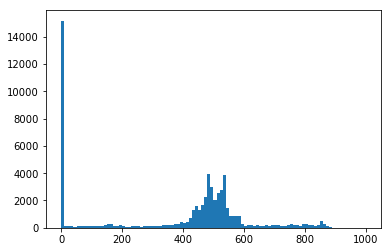

In [19]:
plt.hist(pointData['ttfltpos'],range=(0,1000),bins=100);

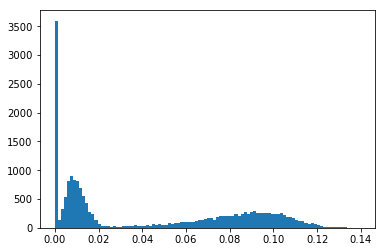

In [49]:
plt.hist(pointData['ttfltposampl'],bins=100);

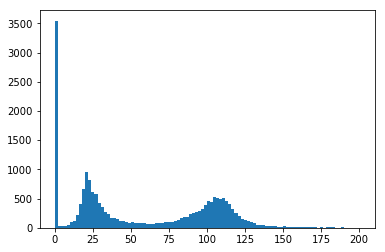

In [51]:
plt.hist(pointData['ttfltposfwhm'],bins=100,range=(0,200));